Density Estimation :- 

    Density estimation is a statistical technique used to estimate the probability density function (PDF) of a random variable. In simpler terms, it helps you understand how data is distributed, showing where data points are concentrated and where they are sparse. This technique is widely used in data analysis, machine learning, and exploratory data visualization. Let's break it down step by step.

Types of Density Estimation :-

    Density estimation can be broadly categorized into two types:

    Parametric Methods:
        Assumes the data follows a known distribution (e.g., Normal, Exponential).
        Parameters of the distribution are estimated from the data.
        Example: Maximum Likelihood Estimation (MLE) for fitting a Gaussian distribution.

    Non-Parametric Methods:
        Does not assume any specific distribution.
        More flexible and suitable for unknown or complex data distributions.
        Example: Histogram, Kernel Density Estimation (KDE), Nearest Neighbor methods.


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm

### Parametric Method

In [2]:
sample = np.random.normal(loc = 50,scale=5 , size=1000)

In [3]:
sample.mean()


50.04060483927689

1. Population vs. Sample:

    The population mean (μ) is the true average of the entire population (in this case, 50).

    The sample mean (x̄) is the average of the sampled data (your 1000 randomly drawn values).

    Unless the sample contains every possible value from the population, the sample mean will likely differ slightly from the population mean.

2. Random Sampling Variability:

    Every time you randomly draw a sample, the values will vary due to randomness.

    This variability causes the sample mean to fluctuate around the true population mean.

3. Law of Large Numbers:

    The larger the sample size, the closer the sample mean is expected to get to the population mean.

    With a sample size of 1000, your sample mean (50.08) is very close to 50, but not exactly equal.

4. Standard Error of the Mean (SEM):

    The standard error measures how much the sample mean is expected to vary:

    $$
         \text{SEM} = \frac{\sigma}{\sqrt{n}}
    $$

    where,

        σ=5 (population standard deviation, as given).

        n=1000 (sample size).

    $$
         \text{SEM} = \frac{5}{\sqrt{1000}} {\approx 0.158}
    $$

    This means the sample mean will generally be within ±0.158 of the population mean for most samples.
5. Practical Explanation:

    The mean is close to 50, but small deviations like 50.08 are expected because you're estimating the population mean based on a sample.

### Reducing the Difference : 

        Increase the sample size: A larger sample reduces the SEM, making the sample mean closer to the population mean.

        Take multiple samples and average the sample means: This also helps converge to the population mean.

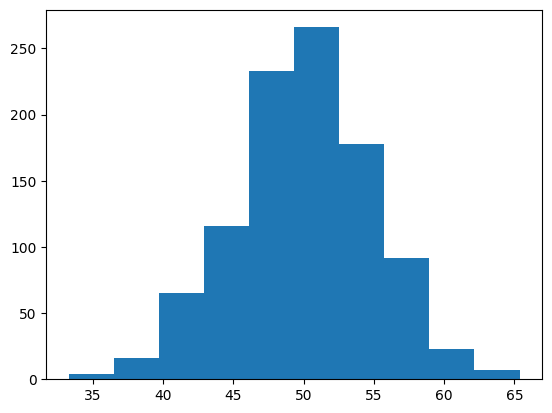

In [4]:
plt.hist(sample,bins = 10)
plt.show()

In [5]:
sample_mean = sample.mean()
sample_std  = sample.std()

In [6]:
dist = norm(sample_mean,sample_std)

In [7]:
values = np.linspace(sample.min() , sample.max() ,num=100 )

In [8]:
probability = [dist.pdf(value) for value in values]

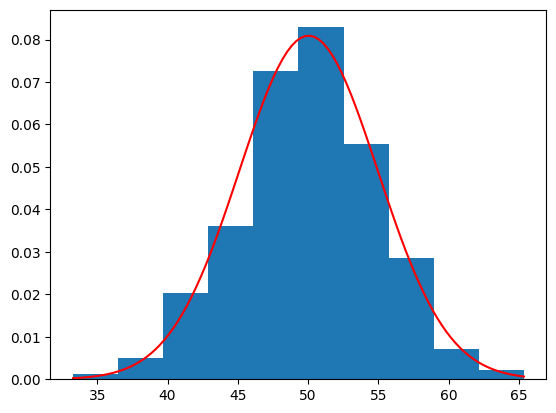

In [10]:
plt.hist(sample,density=True)
plt.plot(values,probability,color = 'red')
plt.show()

### Non - Parametic Density Estimator

A non-parametric density estimator is a method to estimate the probability density function (PDF) of a random variable without assuming any specific parametric form (like Normal, Exponential, etc.) for the underlying distribution. Instead, it derives the density purely from the data.

One of the most common non-parametric density estimators is the Kernel Density Estimation (KDE).

What is kde ?

    KDE smooths the data points by placing a "kernel" (a small bump or function) at each data point. The sum of these kernels gives the estimated density.
    Unlike histograms, KDE produces a smooth, continuous curve rather than discrete bins.

    Formula:-

$$
\hat{f}(x) = \frac{1}{n h} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)
$$
    Where , 
        f^​(x): Estimated density at point xx.
        n: Number of data points.
        xi​: Data points from the sample.
        h: Bandwidth (controls the smoothness of the curve).
        K: Kernel function (e.g., Gaussian, Epanechnikov).

Components of KDE:-

1. Kernel Function K:
        The kernel determines the shape of the "bump" around each data point.

        Common choices:

            Gaussian (bell-shaped curve).
            Epanechnikov (parabolic shape).
            Uniform (flat-top shape).       
2. Bandwidth(h):
        Bandwidth controls the width of the kernel.

            Small h: Captures fine details but may overfit (too spiky).
            Large hh: Smoothens the curve but may underfit (too broad).

Advantage of KDE:-

        Flexible — doesn’t assume the data follows a specific distribution.
        Produces a smooth and visually appealing curve.
        Handles multimodal distributions (distributions with multiple peaks).
![alt text](<images\kde images.png>)


In [11]:
sample1 = np.random.normal(loc = 20 ,scale = 5 , size= 300)
sample2 = np.random.normal(loc = 40 , scale= 5 ,size = 700)

sample = np.hstack((sample1,sample2))

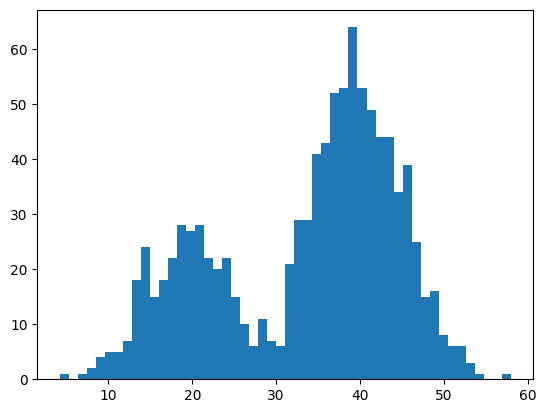

In [12]:
plt.hist(sample,bins = 50)
plt.show()

In [13]:
sample = sample.reshape((len(sample),1))

In [14]:
from sklearn.neighbors  import KernelDensity

model = KernelDensity(bandwidth= 3 ,kernel='gaussian')

model.fit(sample)

KernelDensity(bandwidth=3)

In [17]:
values = np.linspace(sample.min() , sample.max() , 100)
values = values.reshape((len(values),1))

In [18]:
probability = model.score_samples(values)
probability = np.exp(probability)   #we use exponential function because model.score_sample return log of probility

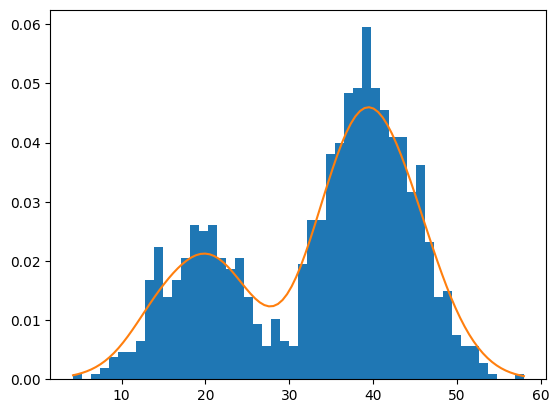

In [19]:
plt.hist(sample , bins = 50 ,density = True)
plt.plot(values , probability)
plt.show()

### Probability Density Function(PDF) and Cummulative Distribution Function(CDF)

The Probability Density Function (PDF) and the Cumulative Distribution Function (CDF) are two fundamental concepts in probability and statistics. Here's a detailed explanation of converting a PDF to a CDF:

1. Understanding PDF and CDF

        PDF (Probability Density Function): A function that describes the likelihood of a random variable taking on a specific value. The area under the PDF curve over a range gives the probability of the variable falling within that range.

        CDF (Cumulative Distribution Function): A function that gives the probability that a random variable is less than or equal to a specific value. It is the cumulative sum (integral) of the PDF up to that point.

        Mathematically, if f(x) is the PDF, then the CDF F(x) is defined as:
$$
F(x) = \int_{-\infty}^{x} f(x) \, dx
$$
![alt text](images\cdf_pdf.png)



### Benifits of PDF and CDF

In [20]:
df = sns.load_dataset('iris')

In [21]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


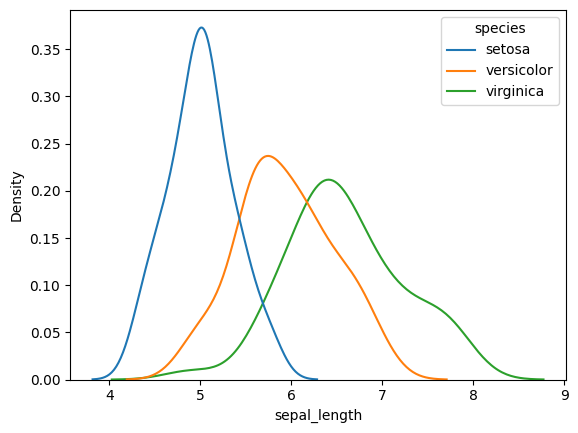

In [24]:
sns.kdeplot(data = df, x = 'sepal_length',hue = 'species')
plt.show()

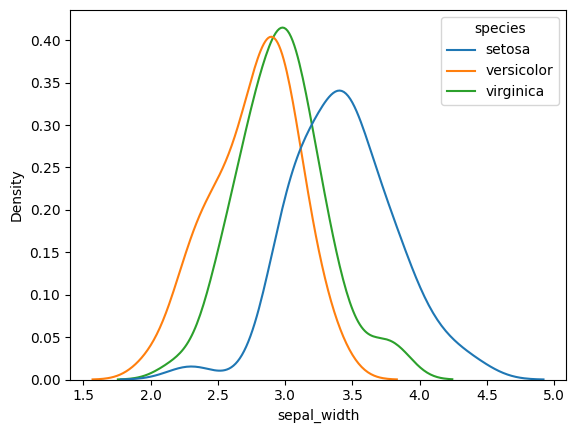

In [25]:
sns.kdeplot(data = df, x = 'sepal_width',hue = 'species')
plt.show()

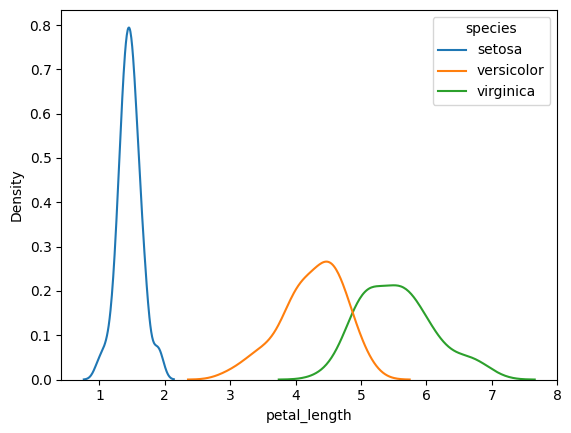

In [26]:
sns.kdeplot(data = df, x = 'petal_length',hue = 'species')
plt.show()

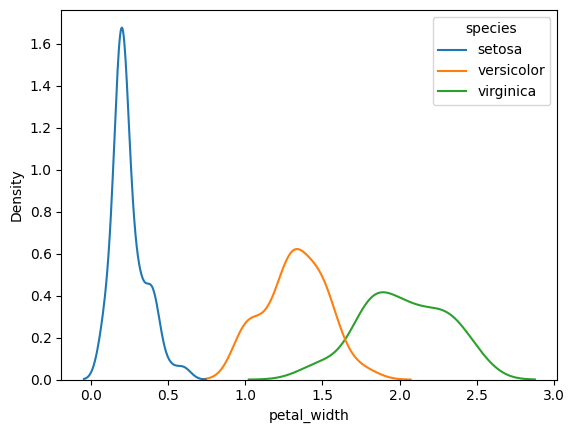

In [ ]:
sns.kdeplot(data = df, x = 'petal_width',hue = 'species')
plt.show()

##### Now if someon ask you to keep two column and delete two column in (sepal_length , sepal_width , Petal_length , petal_width) which one you choose and which one you delete?

After seeing all above graph a can say petal_length , petal_width is two column that i want to keep because these two column clearly classify the species.

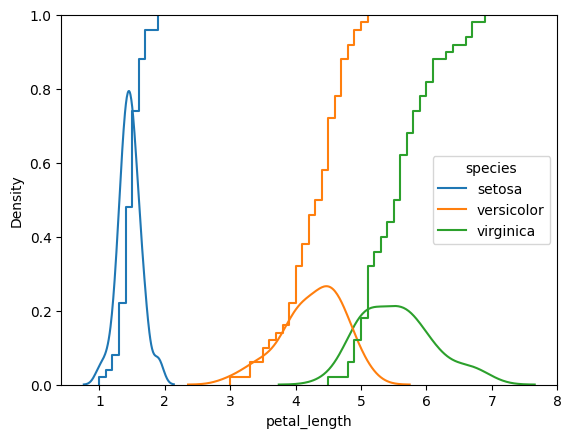

In [ ]:
sns.kdeplot(data = df , x= 'petal_length' , hue = 'species')
sns.ecdfplot(data = df , x = 'petal_length' , hue = 'species')
plt.show()

Here CDF showing us the pecentage of accuracy. If we see the  above graph and if petal_length is 4.5 then there is almost 99% chance that it will be varsicolor and 0% chance for virginica

### 2D Density Plot:- 

A 2D density plot is a visualization that shows the distribution of two continuous variables and how their values relate to each other. It uses colors or contour lines to represent the density of data points at different values of the two variables, making it particularly useful for understanding correlations and patterns in bivariate data.

1. X and Y Axes: These represent the two continuous variables in your dataset. Each axis will have its own scale based on the range of values for each variable.

2. Color or Contour Lines: The color intensity or contour lines represent the density of data points in different regions of the plot. Lighter or more intense colors typically indicate higher densities, meaning more data points are concentrated in those areas.    

3. Interpretation: The plot helps you see where data points are clustered, spread out, or if there are any outliers.

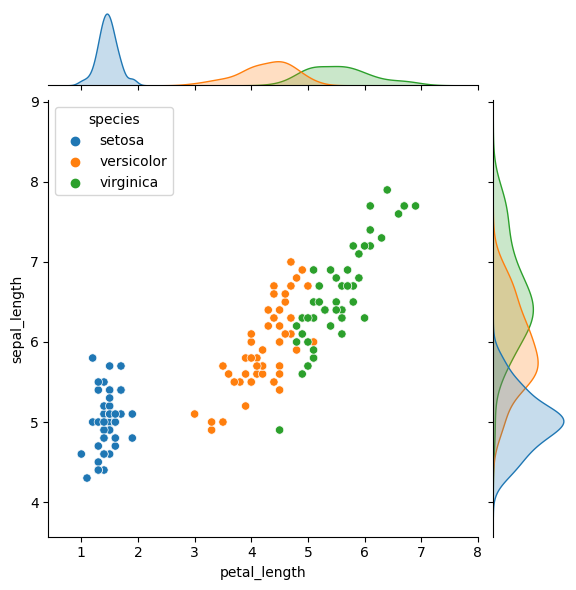

In [28]:
sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="scatter",hue = 'species')
plt.show()

[]

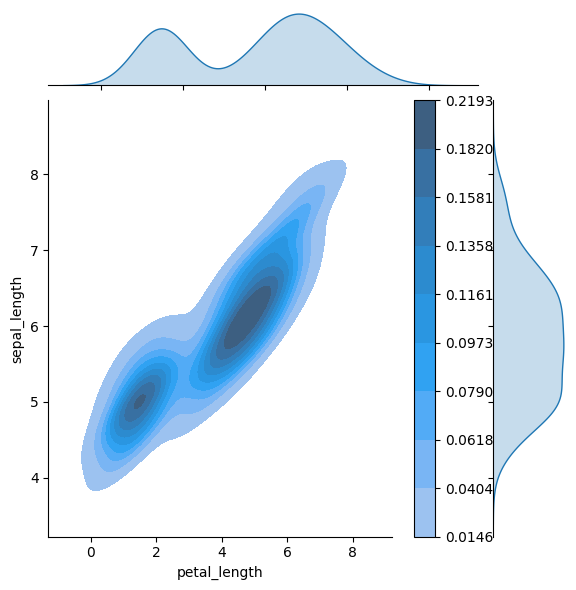

In [29]:
sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)
plt.plot()